<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/1101_ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
if [[ ! -d utils ]]; then
    mkdir utils
    cd utils
    curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/graphs.py
fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1465  100  1465    0     0   6399      0 --:--:-- --:--:-- --:--:--  6425


In [2]:
%%file 1.graph
1 16 3 13
2 12 3 14
3 9 5 20
1 14 4 14
2 7 5 4
-

Writing 1.graph


In [3]:
with open('1.graph') as file:
    G = []
    for line in file:
        if line.startswith('-'):
            G.append([])
            continue
        nums = list(map(int, line.split()))
        G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

    print(G)


[[(1, 16), (3, 13)], [(2, 12), (3, 14)], [(3, 9), (5, 20)], [(1, 14), (4, 14)], [(2, 7), (5, 4)], []]


In [4]:
from utils import graphs

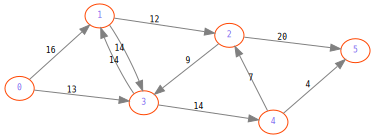

In [5]:
graphs.show(G, weighted=True, directed=True)

In [6]:
import numpy as np

In [23]:
n = len(G)
G1 = np.full((n, n), np.nan)

In [24]:
for u in range(n):
    for v, w in G[u]:
        G1[u, v] = w
print(G1)

[[nan 16. nan 13. nan nan]
 [nan nan 12. 14. nan nan]
 [nan nan nan  9. nan 20.]
 [nan 14. nan nan 14. nan]
 [nan nan  7. nan nan  4.]
 [nan nan nan nan nan nan]]


In [12]:
import math

def findAugmentingPath(G, s, t):
    n = len(G)
    visited = [False]*n
    augPath = []

    def dfs(u, bottleNeck):
        visited[u] = True
        augPath.append(u)
        if u == t:
            return bottleNeck
        for v in range(n):
            if G[u, v] > 0 and not visited[v]:
                bn2 = dfs(v, bottleNeck if bottleNeck <= G[u, v] else G[u, v])
                if visited[t]:
                    return bn2
        augPath.pop()

    bottleNeck = dfs(s, math.inf)

    return augPath, bottleNeck

findAugmentingPath(G1, 0, 5)

([0, 1, 2, 3, 4, 5], 4.0)

In [27]:
def fordFulkerson(G, s, t):
    n = len(G)
    Gres = G.copy()
    for i in range(n):
        for j in range(n):
            if not np.isnan(Gres[i, j]) and np.isnan(Gres[j, i]):
                Gres[j, i] = 0
    Gflow = np.zeros((n, n))

    maxFlow = 0
    augmentingPath, bottleNeck = findAugmentingPath(Gres, s, t)
    while augmentingPath:
        for i in range(len(augmentingPath) - 1):
            u = augmentingPath[i]
            v = augmentingPath[i+1]
            Gres[u, v] -= bottleNeck
            Gres[v, u] += bottleNeck
            Gflow[u, v] += bottleNeck
        maxFlow += bottleNeck
        augmentingPath, bottleNeck = findAugmentingPath(Gres, s, t)

    return maxFlow, Gflow

23.0


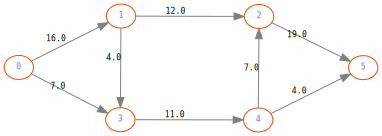

In [29]:
maxFlow, G2 = fordFulkerson(G1, 0, 5)
print(maxFlow)
n = len(G2)
G3 = [[] for _ in range(n)]
for i in range(n):
    for j in range(n):
        if G2[i, j] > 0 and G2[i, j] != G2[j, i]:
            G3[i].append((j, G2[i, j]))

graphs.show(G3, directed=True, weighted=True)